In [1]:
using ContinuumWorld
using POMDPs
using Interact
value = Interact.value
using ProfileView
using GridInterpolations
using Plots
pyplot() # or you can use e.g. gr()

Plots.PyPlotBackend()


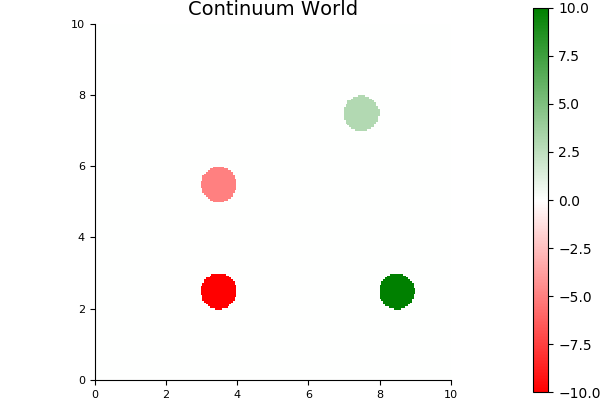

In [2]:
w = CWorld()

dummy_s = Vec2(0.0, 0.0)
dummy_a = Vec2(0.0, 0.0)
plot(CWorldVis(w, f=sp->reward(w,dummy_s,dummy_a,sp)))

In [3]:
nx = 30
ny = 30
grid = RectangleGrid(linspace(w.xlim..., nx), linspace(w.ylim..., ny))

sol = CWorldSolver(max_iters=50, m=50, grid=grid)

@time solve(sol, w);

finished iteration 50
extracting policy...     done.
  4.660661 seconds (38.94 M allocations: 2.388 GiB, 12.73% gc time)


Interact.Options{:SelectionSlider,Any}(1: "input" = 25 Any , "i", 25, "25", 25, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict{Any,Any}(Pair{Any,Any}(2, "2"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(39, "39"),Pair{Any,Any}(46, "46"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(42, "42"),Pair{Any,Any}(29, "29"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(20, "20"),Pair{Any,Any}(14, "14")…)), Any[], Any[], true, "horizontal")


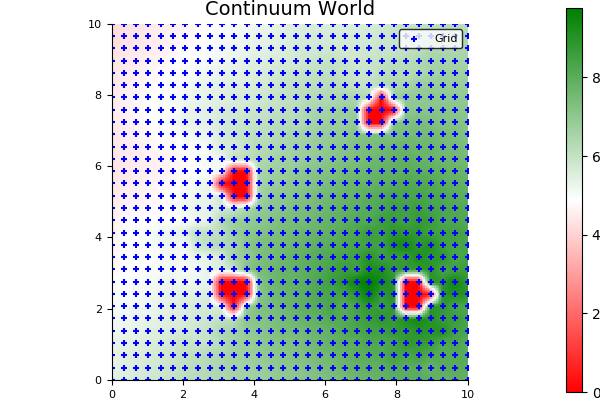

In [4]:
@manipulate for i in 1:length(sol.value_hist)
    v = sol.value_hist[i]
    plot(CWorldVis(w, f=s->evaluate(v, s), g=sol.grid))
end